In [45]:
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces

Recolección de los datos 

In [46]:
faces = fetch_olivetti_faces()
faces.DESCR

'.. _olivetti_faces_dataset:\n\nThe Olivetti faces dataset\n--------------------------\n\n`This dataset contains a set of face images`_ taken between April 1992 and \nApril 1994 at AT&T Laboratories Cambridge. The\n:func:`sklearn.datasets.fetch_olivetti_faces` function is the data\nfetching / caching function that downloads the data\narchive from AT&T.\n\n.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html\n\nAs described on the original website:\n\n    There are ten different images of each of 40 distinct subjects. For some\n    subjects, the images were taken at different times, varying the lighting,\n    facial expressions (open / closed eyes, smiling / not smiling) and facial\n    details (glasses / no glasses). All the images were taken against a dark\n    homogeneous background with the subjects in an upright, frontal position \n    (with tolerance for some side movement).\n\n**Data Set Characteristics:**\n\n    ======

Exploración de los datos

In [47]:
faces.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [48]:
faces.images.shape

(400, 64, 64)

In [49]:
faces.target.shape

(400,)

In [50]:
faces.data.shape

(400, 4096)

In [51]:
def print_faces(images, target,top_n):
    fig = plt.figure(figsize = (12,12))
    fig.subplots_adjust(left=0, right=1, bottom=0,top=1, hspace=0.05,wspace=0.05)
    for i in range(top_n):
        #Visualizar imagenes en matriz de 20x20
        p = fig.add_subplot(20,20,i+1,xticks=[], yticks=[])
        p.imshow(images[i],cmap=plt.cm.bone)
        
        #Incluir etiqueta objetivo en la imagen
        p.text(0,14,str(target[i]))
        p.text(0,60,str(i))

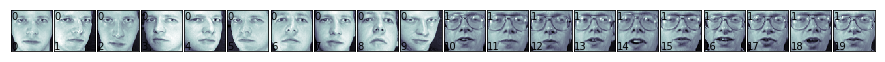

In [52]:
print_faces(faces.images, faces.target, 20)

Preparación de los datos

In [53]:
np.max(faces.data)

1.0

In [54]:
np.min(faces.data)

0.0

In [55]:
np.mean(faces.data)

0.5470426

Entrenamiento de la Máquina de Soporte Vectorial

In [56]:
from sklearn.svm import SVC

In [57]:
svc_1 = SVC(kernel='linear')

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, test_size=0.2, random_state=0)

In [59]:
from sklearn.model_selection import cross_validate
from scipy.stats import sem
from sklearn.model_selection import cross_val_score
#cv_results = cross_validate(lasso, X, y, cv=3,return_train_score=False)

In [60]:
scores = cross_val_score(svc_1, X_train, y_train, cv=5)
scores

/Users/karinatorres/anaconda3/envs/MachineLearning/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


array([0.94871795, 0.94736842, 0.95384615, 0.94827586, 0.95348837])

In [61]:
np.mean(scores)

0.9503393515557447

In [77]:
from sklearn import metrics

def train_and_evaluate(clf,X_train, X_test,y_train,y_test):
    clf.fit(X_train,y_train)
    print("Accuracy on training set:")
    print(clf.score(X_train,y_train))
    print("Accuracy on testing set:")
    print(clf.score(X_test,y_test))
    
    y_pred = clf.predict(X_test)
    print ("Classification Report:")
    print (metrics.classification_report(y_test, y_pred))
    print ("Confusion Matrix:")
    print (metrics.confusion_matrix(y_test, y_pred))

In [78]:
train_and_evaluate(svc_1, X_train, X_test, y_train, y_test)

Accuracy on training set:
1.0
Accuracy on testing set:
0.9875
Classification Report:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3
           7       1.00      0.67      0.80         3
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         4
          15       1.00      1.00      1.00         3
          17       1.00      1.00      1.00       

In [69]:
y_pred=svc_1.predict(X_test)

In [70]:
eval_faces = [np.reshape(a, (64, 64)) for a in X_test]

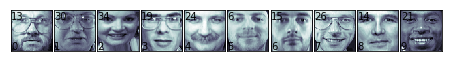

In [71]:
print_faces(eval_faces,y_pred,10)

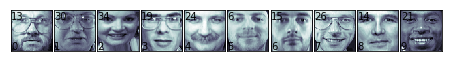

In [72]:
print_faces(eval_faces,y_test,10)